# Challenge-1 Graph Theory
IMT Atlantique 

*Authors:*

1. *Antoine HORRER*

2. *Kadriye Nur BAKIRCI*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Prepare the Enviroment & Data

In [ ]:
# Import important libraries
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
import seaborn as sns
import random

In [ ]:
# Convert csv into Pandas Dataframes
df_empty = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/Data/empty.csv', sep='\t', header='infer')
df_location = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/Data/location_with_60percent_of_nodes_remoded.csv',sep='\t', header='infer')
df_college = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/Data/college_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')
df_employer1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/Data/employer_with_60percent_of_nodes_remoded.csv',sep='\t', header='infer')

In [ ]:
# Convert csv into Pandas Dataframes for testing
df_location_truth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/groundtruth/location.csv',sep='\t', header='infer')
df_college_truth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/groundtruth/college.csv', sep='\t', header='infer')
df_employer_truth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/groundtruth/employer.csv',sep='\t', header='infer')

##Explore the Dataset

In [ ]:
dataframes = [df_empty, df_location, df_college, df_employer1]
for df in dataframes:
  # Get the shape of the dataframe
  print(f'Dataset shape:\n{df.shape}\n')

  # Get the names of the attributes
  print(f'Dataset attributes:\n{df.columns}\n')

  # Get the overall description of the dataset with the data types
  print(f'Dataset general information:\n{df.info()}\n')

  # Get description of categorical attributes
  print(f'Dataset description:\nCategorical Data\n{df.describe(include = object)}')

Dataset shape:
(475, 1)

Dataset attributes:
Index(['name'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    475 non-null    object
dtypes: object(1)
memory usage: 3.8+ KB
Dataset general information:
None

Dataset description:
Categorical Data
          name
count      475
unique     475
top     U27476
freq         1
Dataset shape:
(336, 2)

Dataset attributes:
Index(['name', 'location'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      336 non-null    object
 1   location  336 non-null    object
dtypes: object(2)
memory usage: 5.4+ KB
Dataset general information:
None

Dataset description:
Categorical Data
         name                        location
count     336    

In [ ]:
dataframes = [df_location, df_college, df_employer1]
for df in dataframes:
  # How many merge / user?
  print(df.groupby('name').count().describe())

       location
count     336.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
          college
count  230.000000
mean     1.052174
std      0.241664
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      3.000000
         employer
count  297.000000
mean     3.107744
std      1.976682
min      1.000000
25%      1.000000
50%      3.000000
75%      4.000000
max     13.000000


In [ ]:
dataframes = [df_location, df_college, df_employer1]
for df in dataframes:
  # Check for any null values 
  print(f'Null Values per Feature\n{df.isnull().sum()}\n')

Null Values per Feature
name        0
location    0
dtype: int64

Null Values per Feature
name       0
college    0
dtype: int64

Null Values per Feature
name        0
employer    0
dtype: int64



Since in employer and college dataframe there are some nodes with different type of attributes we want to merge all different attributes into one row.

In [ ]:
# Groups the dataFrame df_employer by the column 'name' and aggregates the remaining columns into lists for each group
df_employer = df_employer1.groupby('name').agg(lambda x: x.tolist())
# Converts each element of the 'employer' column, which is a list of strings, into a single string by joining the elements with commas
df_employer['employer'] = df_employer['employer'].apply(lambda x: ','.join(x))
# Reset index
df_employer=df_employer.reset_index()
# Check dataframe
df_employer

,name,employer
0,U10051,"krames staywell,cygnus business media,american..."
1,U1045,"measured progress,saint mary academy,psychomet..."
2,U1055,graduate management admission council&#xae; (g...
3,U10631,ets
4,U1068,"little brothers - friends of elderly,leaders i..."
...,...,...
292,U9667,"john deere,chillers inc,panera bread"
293,U9680,champaign-urbana community fabrication laborat...
294,U9689,"general atomics,center for plasma and material..."
295,U9709,"lyondellbasell,university of alabama,subway,gi..."


In [ ]:
# Groups the dataFrame df_college by the column 'name' and aggregates the remaining columns into lists for each group
df_college = df_college.groupby('name').agg(lambda x: x.tolist())
# Converts each element of the 'college' column, which is a list of strings, into a single string by joining the elements with commas
df_college['college'] = df_college['college'].apply(lambda x: ','.join(x))
# Reset index
df_college=df_college.reset_index()
# Check dataframe
df_college

,name,college
0,U10051,university of illinois at urbana-champaign
1,U1045,"southern illinois university carbondale,univer..."
2,U1055,sungkyunkwan university
3,U1068,"rider university,university of richmond"
4,U1104,universiti teknologi malaysia
...,...,...
225,U9667,university of illinois at urbana-champaign
226,U9680,university of illinois at urbana-champaign
227,U9689,university of illinois at urbana-champaign
228,U9709,university of illinois at urbana-champaign


In [ ]:
# Extracts the unique values in the 'name' column of the df_empty and convert to list 
empty = df_empty['name'].drop_duplicates().tolist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, 'urbana-champaign illinois area'),
  Text(1, 0, 'greater chicago area'),
  Text(2, 0, 'san francisco bay area'),
  Text(3, 0, 'greater new york city area'),
  Text(4, 0, 'greater boston area'),
  Text(5, 0, 'china'),
  Text(6, 0, 'beijing city china'),
  Text(7, 0, 'shanghai city china'),
  Text(8, 0, 'washington d.c. metro area'),
  Text(9, 0, 'greater seattle area'),
  Text(10, 0, 'greater los angeles area'),
  Text(11, 0, 'united states'),
  Text(12, 0, 'austin texas area'),
  Text(13, 0, 'bangladesh'),
  Text(14, 0, 'hyderabad area india'),
  Text(15, 0, 'miami fort laud

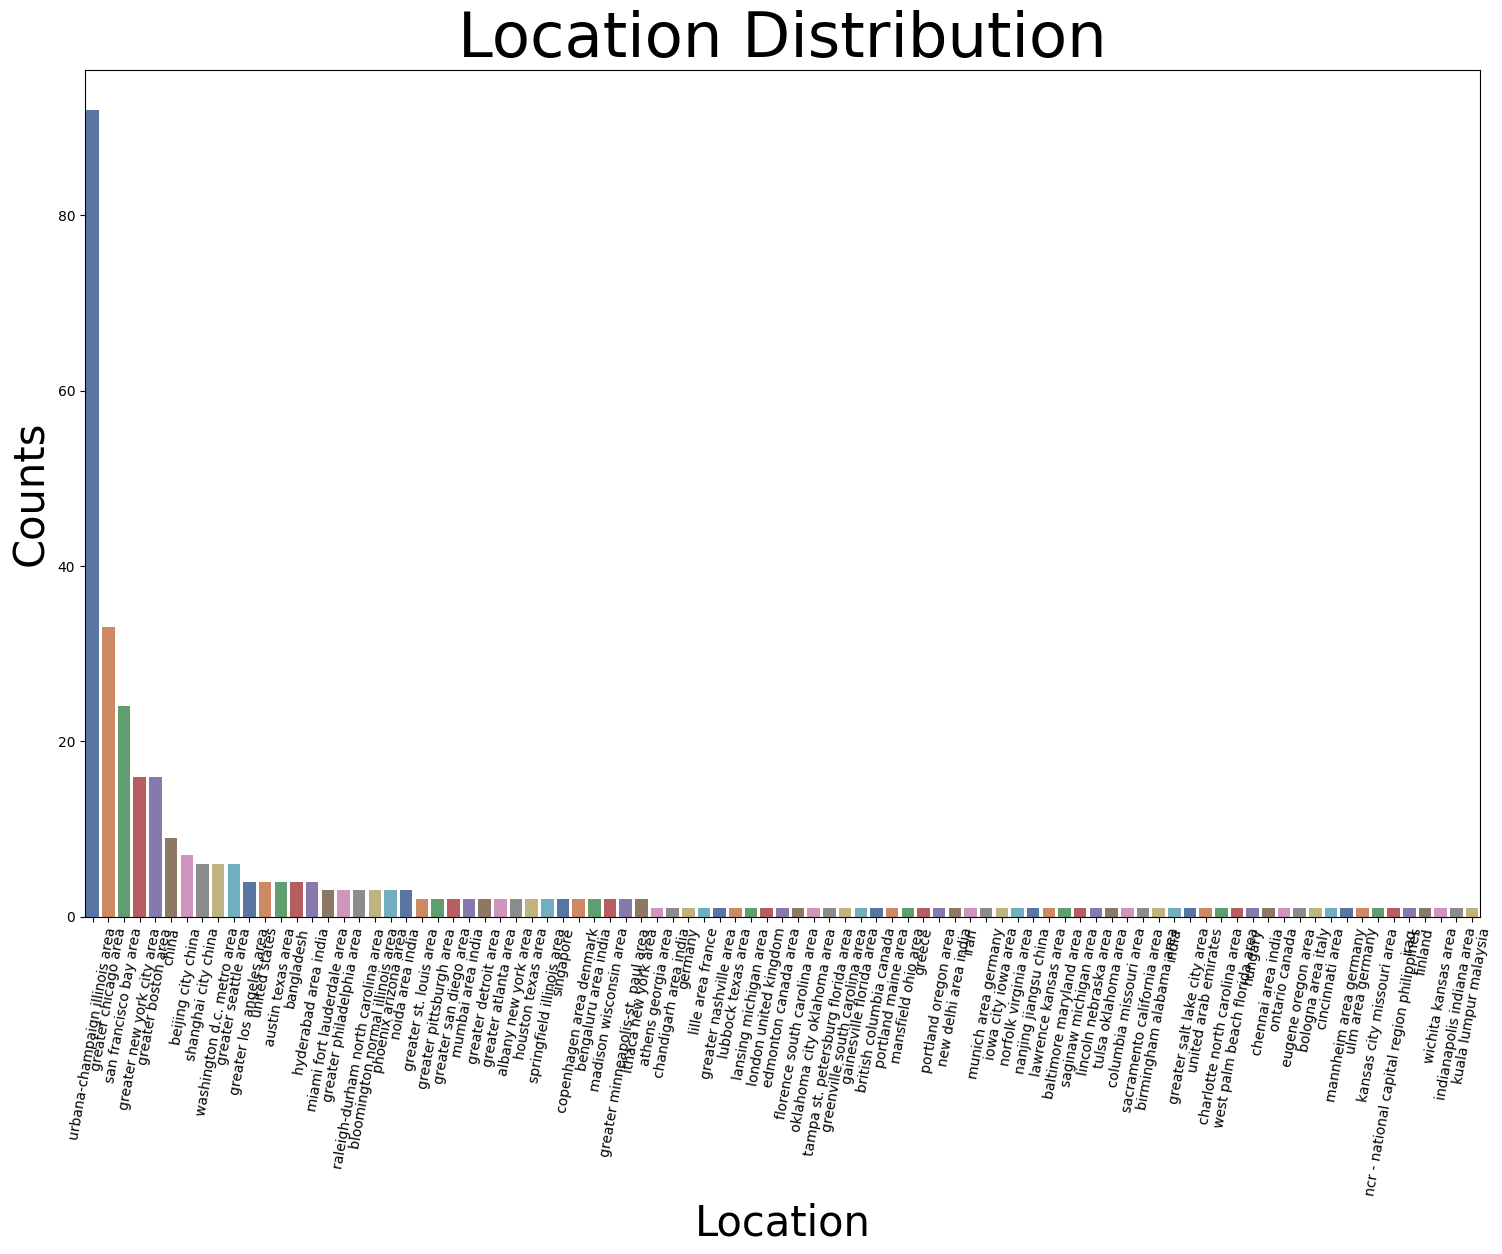

In [ ]:
# Just for curiosity  plot the distribution of location in df_location dataframe
fig_dims = (18, 11)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= df_location.location.value_counts().index , 
            y =df_location.location.value_counts().values, 
            palette='deep', )
plt.title('Location Distribution', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Counts',fontdict ={'size': 30})
plt.xlabel('Location',fontdict ={'size': 30})
plt.xticks(rotation=80)

In [ ]:
# Load the graph
# The graph is an extraction from LinkedIn Social Network
G = nx.read_gexf("/content/drive/MyDrive/Colab Notebooks/Graph Theory/Challenge 1/Data/mediumLinkedin.gexf")

## Exploration of the graph : relational data understanding
## First metrics

In [ ]:
# Networkx short summary of information for the graph g
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 811
Number of edges 1597
Average degree 3.938347718865598


See how many node information missing in the dataframes

In [ ]:
print("%d nodes have no employer attributes among the %d users in the graph" % (G.number_of_nodes()-len(df_employer[['name']].drop_duplicates()), G.number_of_nodes()))
print("%d nodes have no college attributes among the %d users in the graph" % (G.number_of_nodes()-len(df_college[['name']].drop_duplicates()), G.number_of_nodes()))
print("%d nodes have no location attributes among the %d users in the graph" % (G.number_of_nodes()-len(df_location[['name']].drop_duplicates()), G.number_of_nodes()))

514 nodes have no employer attributes among the 811 users in the graph
581 nodes have no college attributes among the 811 users in the graph
475 nodes have no location attributes among the 811 users in the graph


## Homophily understanding
Test here the homophily in the graph for each attribute.

First way to test homophily in the graph for each attribute

In [ ]:
# Create a dictionary to map each unique value in the 'name' column of the DataFrame to a string 
#that is obtained by concatenating all the elements of the attribute column that correspond to that unique value in the 'name' column.
employer_list = df_employer.set_index('name')['employer'].apply(lambda x: ''.join(x)).to_dict()
location_list = df_location.set_index('name')['location'].apply(lambda x: ''.join(x)).to_dict()
college_list = df_college.set_index('name')['college'].apply(lambda x: ''.join(x)).to_dict()

# Assign employer attribute to nodes in the graph
for node_id in G.nodes:
    G.nodes[node_id]['employer']= employer_list.get(node_id)
    G.nodes[node_id]['location'] = location_list.get(node_id)
    G.nodes[node_id]['college'] = college_list.get(node_id)

# Calculate assortativity coefficient for employer attribute
e = nx.attribute_assortativity_coefficient(G, 'employer')
l = nx.attribute_assortativity_coefficient(G, 'location')
c = nx.attribute_assortativity_coefficient(G, 'college')

print(f"Assortativity coefficient for employer attribute: {e}")
print(f"Assortativity coefficient for location attribute: {l}")
print(f"Assortativity coefficient for college attribute: {c}")

Assortativity coefficient for employer attribute: 0.019418389262021506
Assortativity coefficient for location attribute: 0.049327423323379624
Assortativity coefficient for college attribute: 0.04848618998430707


In [ ]:
# Firstly, the degree assortativity coefficient is found
nx.degree_assortativity_coefficient(G)

-0.22480574380333782

Second way to test homophily in the graph for each attribute

In [ ]:
# Let's check the attributes for all nodes
attributes = ["employer","location","college"]

# Create loop to check each attribute and calculate the assortativity coefficient for categorical attributes
for attribute in attributes:
  print(attribute)
  print(nx.get_node_attributes(G,attribute))
  print(nx.attribute_assortativity_coefficient(G,attribute))

employer
{'U27476': None, 'U4665': None, 'U1313': 'discovery education,ctb mcgraw-hill,university of charleston university of south carolina,south carolina department of education,chesapeake va and sumter sc,virgina state corrections', 'U8804': 'gruppo euris spa,iconsulting,econoetica,universit&#xe0; di bologna,university of illinois at urbana-champaign', 'U14078': None, 'U9628': None, 'U9721': None, 'U2649': 'bocom international,inventiv health,glaxosmithkline plc,zhongrong international trust co. ltd', 'U27759': None, 'U7310': 'microsoft,illinois computer technology,university of illinois at urbana-champaign,state farm insurance', 'U22859': 'amazon,ibm india research lab,coordinated science lab,toyota technical center', 'U1417': 'designing events', 'U25611': 'bluegranite,measured progress,sweetser', 'U24095': None, 'U3895': 'vertica systems an hp company,morgan stanley,microsoft,google', 'U13005': 'illinois state university,university of illinois at urbana-champaign', 'U2620': None, 

## Strategy 0 to fill the empty profiles = your baseline: naive method

The assumption is that two connected nodes are likely to share the same attribute values. Here we choose the most frequently used attribute value among the neighbors.

In [ ]:
naive_predicted_values={}

In [ ]:
def naive_method(graph, empty, df, attribute):
    """   Predict the missing attribute with a simple but effective
    relational classifier. 
    
    The assumption is that two connected nodes are 
    likely to share the same attribute value. Here we chose the most frequently
    used attribute by the neighbors
    
    Parameters
    ----------
    graph : graph
       A networkx graph
    empty : list
       The nodes with empty attributes 
    df : pandas dataframe 
       Either location, employer or college dataframe. 

    Returns
    -------
    predicted_values : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node (from empty), value is a list of attribute values. Here 
       only 1 value in the list.
     """
    predicted_values={}
    for n in empty:
        nbrs_attr_values=[] 
        for nbr in graph.neighbors(n):
            # attribute values for the node nbr
            attr = df.loc[df.name == nbr ,attribute].values
            if attr.size > 0: #array not empty
                for val in attr:
                    nbrs_attr_values.append(val)
        predicted_values[n]=[]
        if nbrs_attr_values: # non empty list
            # count the number of occurrence each value and returns a dict
            cpt=Counter(nbrs_attr_values)
            # take the most represented attribute value among neighbors
            a,nb_occurrence=max(cpt.items(), key=lambda t: t[1])
            predicted_values[n].append(a)
    return predicted_values

In [ ]:
# Create values for each attribute
naive_predicted_values_employer = naive_method(G, empty, df_employer, "employer")
naive_predicted_values_location = naive_method(G, empty, df_location, "location")
naive_predicted_values_college = naive_method(G, empty, df_college, "college")

### Evaluation

In [ ]:
def evaluation_accuracy(groundtruth, pred):
    """    Compute the accuracy of your model.

     The accuracy is the proportion of true results.

    Parameters
    ----------
    groundtruth : pandas dataframe 
       Either location, employer or college dataframe. 
    pred : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node, value is a list of attribute values. 

    Returns
    -------
    out : float
       Accuracy.
    """
    true_positive_prediction=0
    predicted=0
    for p_key, p_value in pred.items():
        attr = groundtruth.loc[groundtruth.name == p_key ,groundtruth.columns[1]].values
        # if prediction is empty, e.g. [], and so is the groundtruth
        # May happen, we count it as a true prediction
        if not p_value and attr.size == 0:
            true_positive_prediction+=1
            predicted+=1
        # counts the number of good prediction for node p_key
        # here len(p_value)=1 but we could have tried to predict more values
        # if p_value == [], we add 0
        true_positive_prediction += len([c for c in p_value if c in attr])
        predicted += len([c for c in p_value])
    return true_positive_prediction*100/predicted

In [ ]:
# Check for attribute employer
result=evaluation_accuracy(df_employer_truth, naive_predicted_values_employer)
print("%f%% of the predictions are true" % result)

13.013699% of the predictions are true


In [ ]:
# Check for attribute location
result=evaluation_accuracy(df_location_truth, naive_predicted_values_location)
print("%f%% of the predictions are true" % result)

32.352941% of the predictions are true


In [ ]:
# Check for attribute college
result=evaluation_accuracy(df_college_truth, naive_predicted_values_college)
print("%f%% of the predictions are true" % result)

42.942943% of the predictions are true


## Strategy 1 to fill the empty profiles
Use Jaccard Similarty

In [ ]:
def jaccard_coefficient_method(graph, empty, df, attribute):
    """Predict the missing attribute with the Jaccard coefficient method. 
    
    The Jaccard coefficient measures the similarity between two sets. Here, we 
    measure the Jaccard coefficient between the set of neighbors of a node with 
    known attributes and the set of neighbors of the node with the missing 
    attribute. The assumption is that two nodes that have similar neighbors are
    likely to have similar attributes. We then choose the most frequently used 
    attribute value among the similar nodes.

    Parameters
    ----------
    graph : graph
        A graph representing the social network.
    empty : list
        The nodes with empty attributes 
    df : pandas dataframe 
        Either location, employer or college dataframe. 
    attribute : str
        The attribute we want to predict, either 'location', 'employer' or 'college'.

    Returns
    -------
    predicted_values : dict 
        A dict of attributes, either location, employer or college attributes. 
        key is a node (from empty), value is a list of attribute values. Here 
        only 1 value in the list.
    """
    predicted_values = {}
    for n in empty:
        nbrs_attr_values = {}  # dictionary to store neighbor's attribute values
        for nbr in graph.neighbors(n):
            # attribute values for the node nbr
            attr = set(df.loc[df.name == nbr, attribute].values.flatten())
            if attr:  # set not empty
                nbrs_attr_values[nbr] = attr
        
        similar_nbrs = {}
        for nbr, attr_values in nbrs_attr_values.items():
            # Jaccard coefficient between the set of neighbors with known attributes and the
            # set of neighbors of the node with the missing attribute
            sim = len(set(graph.neighbors(n)).intersection(set(graph.neighbors(nbr)))) / len(set(graph.neighbors(n)).union(set(graph.neighbors(nbr))))
            similar_nbrs[nbr] = sim
        
        # Select the most similar neighbors and store their attribute values
        most_similar = sorted(similar_nbrs.items(), key=lambda x: x[1])
        similar_attr_values = set()
        for nbr, _ in most_similar:
            similar_attr_values.update(nbrs_attr_values[nbr])
        
        # Count the number of occurrence each value and returns a dict
        if similar_attr_values:
            cpt = Counter(similar_attr_values)
            # Take the most represented attribute value among similar nodes
            a, nb_occurrence = max(cpt.items(), key=lambda t: t[1])
            predicted_values[n] = [a]
    return predicted_values

In [ ]:
# Create values for each attribute
predicted_values_employer_jaccard = jaccard_coefficient_method(G,empty,df_employer,"employer")
predicted_values_location_jaccard = jaccard_coefficient_method(G,empty,df_location,"location")
predicted_values_college_jaccard = jaccard_coefficient_method(G,empty,df_college,"college")

### Evaluation

In [ ]:
# Check for attribute employer
result=evaluation_accuracy(df_employer_truth, predicted_values_employer_jaccard)
print("%f%% of the predictions are true" % result)

2.651515% of the predictions are true


In [ ]:
# Check for attribute location
result=evaluation_accuracy(df_location_truth, predicted_values_location_jaccard)
print("%f%% of the predictions are true" % result)

23.897059% of the predictions are true


In [ ]:
# Check for attribute college
result=evaluation_accuracy(df_college_truth, predicted_values_college_jaccard)
print("%f%% of the predictions are true" % result)

21.789883% of the predictions are true


## Strategy 2 to fill the empty profiles
Weighted relational classifier

In [ ]:
def improved_method(graph, empty, df, attribute):
    """Predict the missing attribute using a weighted relational classifier.

    The assumption is that two connected nodes are likely to share the same
    attribute value. Here we take into account the frequency of the attribute
    values among the neighbors and the overall distribution of the attribute
    values in the dataset.

    Parameters
    ----------
    graph : networkx graph
        A graph representing the social network.
    empty : list
        The nodes with empty attributes.
    df : pandas dataframe
        The dataframe containing the attribute values for each node.
        Either location, employer or college dataframe. 
    attribute : str
        The attribute we want to predict, either 'location', 'employer' or 'college'.

    Returns
    -------
    predicted_values : dict
        A dictionary mapping node IDs to predicted attribute values.
    """
    # Compute the frequency of each attribute value in the dataset
    attr_freq = df[attribute].value_counts(normalize=True).to_dict()
    # Initialize the dictionary of predicted attribute values
    predicted_values = {}
    # Loop over the nodes with missing attributes
    for n in empty:
        # Compute the weighted frequency of each attribute value among the neighbors
        nbrs_attr_values = []
        nbrs_weights = []
        for nbr in graph.neighbors(n):
            # Attribute values for the node nbr
            attr = df.loc[df.name == nbr, attribute].values
            if attr.size > 0:
                for val in attr:
                    nbrs_attr_values.append(val)
                    nbrs_weights.append(attr_freq.get(val, 0.0))
        # If there are no neighbors with known attributes, use the overall frequency
        if not nbrs_attr_values:
            predicted_values[n] = [max(attr_freq, key=attr_freq.get)]
        else:
            # Compute the weighted frequency of each attribute value
            attr_weights = defaultdict(float)
            for i, val in enumerate(nbrs_attr_values):
                attr_weights[val] += nbrs_weights[i]
            # Predict the attribute value with the highest weighted frequency
            predicted_values[n] = [max(attr_weights, key=attr_weights.get)]
    return predicted_values

In [ ]:
# Create values for each attribute
predicted_values_employer_weighted = improved_method(G,empty,df_employer,"employer")
predicted_values_location_weighted = improved_method(G,empty,df_location,"location")
predicted_values_college_weighted = improved_method(G,empty,df_college,"college")

### Evaluation

In [ ]:
# Check for attribute employer
result=evaluation_accuracy(df_employer_truth, predicted_values_employer_weighted)
print("%f%% of the predictions are true" % result)

12.842105% of the predictions are true


In [ ]:
# Check for attribute location
result=evaluation_accuracy(df_location_truth, predicted_values_location_weighted)
print("%f%% of the predictions are true" % result)

31.157895% of the predictions are true


In [ ]:
# Check for attribute college
result=evaluation_accuracy(df_college_truth, predicted_values_college_weighted)
print("%f%% of the predictions are true" % result)

23.789474% of the predictions are true


## Strategy 3 to fill the empty profiles
Homophily Principle

In [ ]:
def homophily_method(graph, empty, df, attribute):
    """Predict the missing attribute using the homophily principle, which states 
    that nodes that are connected in a network are more likely to share the same attribute value.

    Parameters
    ----------
    graph : networkx graph
        A graph representing the social network.
    empty : list
        The nodes with empty attributes.
    df : pandas dataframe
        The dataframe containing the attribute values for each node.
        Either location, employer or college dataframe. 
    attribute : str
        The attribute we want to predict, either 'location', 'employer' or 'college'.

    Returns
    -------
    predicted_values : dict
        A dictionary of predicted attribute values for each node in `empty`.
        The keys are node IDs, and the values are lists of predicted attribute values.
    """

    predicted_values = {}
    for node in empty:
        neighbors = list(graph.neighbors(node))
        neighbor_attrs = []
        for neighbor in neighbors:
            attr = df.loc[df['name'] == neighbor, attribute].values
            if len(attr) > 0:
                neighbor_attrs.append(attr[0])

        if len(neighbor_attrs) == 0:
            predicted_values[node] = []
        else:
            # Compute the most common attribute value among the node's neighbors
            counter = Counter(neighbor_attrs)
            most_common = counter.most_common(1)
            predicted_values[node] = [most_common[0][0]]

    return predicted_values

In [ ]:
# Create values for each attribute
predicted_values_employer_homophily = homophily_method(G,empty,df_employer,"employer")
predicted_values_location_homophily = homophily_method(G,empty,df_location,"location")
predicted_values_college_homophily = homophily_method(G,empty,df_college,"college")

### Evaluation

In [ ]:
# Check for attribute employer
result=evaluation_accuracy(df_employer_truth, predicted_values_employer_homophily)
print("%f%% of the predictions are true" % result)

13.013699% of the predictions are true


In [ ]:
# Check for attribute location
result=evaluation_accuracy(df_location_truth, predicted_values_location_homophily)
print("%f%% of the predictions are true" % result)

32.352941% of the predictions are true


In [ ]:
# Check for attribute college
result=evaluation_accuracy(df_college_truth, predicted_values_college_homophily)
print("%f%% of the predictions are true" % result)

42.942943% of the predictions are true


## Strategy 3.5 to fill the empty profiles
Homophily Principle improved

In [ ]:
def homophily_method2(graph, empty, df, attribute):
    """Predict the missing attribute using the homophily principle, which states 
    that nodes that are connected in a network are more likely to share the same attribute value.

    Parameters
    ----------
    graph : networkx graph
        A graph representing the social network.
    empty : list
        The nodes with empty attributes.
    df : pandas dataframe
        The dataframe containing the attribute values for each node.
        Either location, employer or college dataframe. 
    attribute : str
        The attribute we want to predict, either 'location', 'employer' or 'college'.

    Returns
    -------
    predicted_values : dict
        A dictionary of predicted attribute values for each node in `empty`.
        The keys are node IDs, and the values are lists of predicted attribute values.
    """

    predicted_values = {}
    for node in empty:
        neighbors = list(graph.neighbors(node))
        neighbor_attrs = []
        for neighbor in neighbors:
            attr = df.loc[df['name'] == neighbor, attribute].values
            if len(attr) > 0:
                # Check if the attribute value is a string
                if isinstance(attr[0], str):
                    # Split the string into a list of values and append to the neighbor_attrs list
                    neighbor_attrs.extend(attr[0].split(','))
                else:
                    neighbor_attrs.append(attr[0])

        if len(neighbor_attrs) == 0:
            predicted_values[node] = []
        else:
            # Compute the most common attribute value among the node's neighbors
            counter = Counter(neighbor_attrs)
            most_common = counter.most_common(1)
            predicted_values[node] = [most_common[0][0]]

    return predicted_values

In [ ]:
# Create values for each attribute
predicted_values_employer_homophily2 = homophily_method2(G,empty,df_employer,"employer")
predicted_values_location_homophily2= homophily_method2(G,empty,df_location,"location")
predicted_values_college_homophily2= homophily_method2(G,empty,df_college,"college")

In [ ]:
df = pd.DataFrame.from_dict(predicted_values_employer_homophily2, orient='index', columns=["employer"])
df.index.name = 'name'
df = df.reset_index()
df.to_csv('employer.csv')

In [ ]:
df = pd.DataFrame.from_dict(predicted_values_location_homophily2, orient='index', columns=['location'])
df.index.name = 'name'
df = df.reset_index()
df.to_csv('location.csv')

In [ ]:
df = pd.DataFrame.from_dict(predicted_values_college_homophily2, orient='index', columns=['college'])
df.index.name = 'name'
df = df.reset_index()
df.to_csv('college.csv')

### Evaluation

In [ ]:
# Check for attribute employer
result=evaluation_accuracy(df_employer_truth, predicted_values_employer_homophily2)
print("%f%% of the predictions are true" % result)

27.397260% of the predictions are true


In [ ]:
# Check for attribute location
result=evaluation_accuracy(df_location_truth, predicted_values_location_homophily2)
print("%f%% of the predictions are true" % result)

32.352941% of the predictions are true


In [ ]:
# Check for attribute college
result=evaluation_accuracy(df_college_truth, predicted_values_college_homophily2)
print("%f%% of the predictions are true" % result)

44.744745% of the predictions are true
